# Classifying #LongCovid Tweets

Jana Petrushevska 201058

## Importing the dataset

In [ ]:
import seaborn as sns

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/finki/StandardenProekt VNP/datasets/long_covid_tweets_combined.csv')

In [ ]:
data.head()

,Date,User,Tweets
0,2020-05-20 18:17:48+00:00,elisaperego78,The #LongCovid #COVID19 is starting to be addr...
1,2020-05-21 17:10:28+00:00,elisaperego78,"Interesting point, which I also noted in many ..."
2,2020-05-25 15:53:55+00:00,elisaperego78,Hashtags for disussing the #LongCovid #COVID19...
3,2020-05-27 00:20:42+00:00,elisaperego78,30% of #COVID__19 patients will have long term...
4,2020-05-27 18:36:20+00:00,elisaperego78,The long term damage by #COVID19 is also disc...


In [ ]:
data = data.drop(columns=['User'])
data = data.drop(columns=['Date'])

## Adding symptoms to tweets

In [ ]:
symptoms_list = [
                 'shortness of breath','difficulty breathing','breath fast','chest pain', 'chest tightness', "taking a breath", # 1
                 'fever', 'temperature', 'feverish', 'feeling hot',# 2
                 'depression', 'depressed', 'moody', 'anxiety', 'stress', 'bad mood', 'numbness',"feeling down", "low mood","emotional distress", "aching ", # 3
                 'sore legs','sore arms','sore body','arm pain','leg pain','muscle pain','burning joints', 'facial numbness','brain problems', "joint pain", 'sore', # 4
                 'brain fog', 'concentrate', 'concentration', 'concentrating', 'focus', 'remind', 'confus', 'cognitive' # 5
                 'headache','migraine', "head pounding","head pain",# 6
                 'loss of taste','loss of smell',"can't taste","can't smell",'smell/taste', "tasteless","smellless", "no taste", "no sense of smell",# 7
                 'fatigue', 'tired', 'exhaust', 'weakness',# 8
                 'cough','sore throat' # 9
                 'cant walk', "can't walk", 'unable to walk', 'couldnt walk', "couldn't walk", 'unaid walk', #10
                 'heart inflammation', 'arrhythmia', 'tachycardia', #11
                 'sinus', 'nosebleed', #12
                 'rash', 'bruises', 'skin', #13
                 'lose weight', 'weight loss', 'gain weight', #14
                 'blood clots', "clot formation","thrombus formation","coagulation issue",# 15
                 'hard time sleeping', 'insomnia', 'difficulty sleeping', "can't sleep", "cant sleep", #16
                 'irritated eyes','eye issues','eyes burning','blurry vision','blurred vision', 'itchy eyes',#17
                 'ringing ears','ringing in my ears','ringing in ears', 'burning ears', 'ear buzzing', #18
                 'dizzy','dizziness', 'lighthead','spinning' #19
                 'vomit', 'stomach','stomach pain', 'abdominal pain', 'diarrhea','nausea', "throwing up", #20
                 'flu', 'cold',  #21
                 ]

In [ ]:
def extract_symptoms(tweet):
    extracted_symptoms = []
    for symptom in symptoms_list:
        if symptom in tweet.lower():
            extracted_symptoms.append(symptom)
    return extracted_symptoms

data['Symptoms'] = data['Tweets'].apply(extract_symptoms)

In [ ]:
tweets = data[data['Symptoms'].apply(len) > 0]

num_tweets_with_symptoms = len(tweets)
print("Number of tweets with symptoms:", num_tweets_with_symptoms)

Number of tweets with symptoms: 67226


We get only 67 226 tweets that have symptoms in their content. We drop all of the other tweets.

In [ ]:
symptom_encoding = {
    "shortness of breath": "lung problems",
    "difficulty breathing" : "lung problems",
    "chest pain" : "lung problems",
    "chest tightness" : "lung problems",
    "taking a breath": "lung problems",
    "breath fast" : "lung problems", # lung, breathing problems

    "fever": "fever",
    "feverish": "fever",
    "feeling hot": "fever",
    "temperature" : "fever", # fever

    'depression' : "mentall illness",
    'depressed' : "mentall illness",
    "numbness" : "mentall illness",
    'moody' : "mentall illness",
    'anxiety' : "mentall illness",
    'stress' : "mentall illness",
    "feeling down": "mentall illness",
    "low mood": "mentall illness",
    "emotional distress": "mentall illness",
    'bad mood' : "mentall illness", # mentall illness

    "muscle pain" : "muscle pain",
    "burning joints" : "muscle pain",
    "sore" : "muscle pain",
    "sore legs" : "muscle pain",
    "sore arms" : "muscle pain",
    "sore body" : "muscle pain",
    "arm pain" : "muscle pain",
    "leg pain" : "muscle pain",
    "joint pain" : "muscle pain",
    "aching " : "muscle pain",
    "facial numbness" : "muscle pain", # muscle pain


    "brain fog": "brain fog",
    'concentrate' : "brain fog",
    'concentration' : "brain fog",
    'concentrating' : "brain fog",
    "confus" : "brain fog",
    "cognitive" : "brain fog",
    "brain problems" : "brain fog",
    'focus' : "brain fog",
    'remind' : "brain fog", # Problems with memory and concentration (“brain fog”)

    "migraine" : "migraine",
    "head pounding": "migraine",
    "head pain": "migraine",
    "headache": "migraine", # migraine

    "loss of taste": "no taste/smell",
    "loss of smell" : "no taste/smell",
    "can't taste": "no taste/smell",
    "can't smell": "no taste/smell",
    "tasteless": "no taste/smell",
    "smellless": "no taste/smell",
    "no taste": "no taste/smell",
    "no sense of smell": "no taste/smell",
    "smell/taste": "no taste/smell", # taste / smell


    "fatigue": "fatigue",
    'tired' : "fatigue",
    'weakness' : "fatigue",
    'exhaust' : "fatigue", # fatigue symptoms, Extreme tiredness

    "cough": "throat pain",
    "sore throat" : "throat pain", # throat pain


    'cant walk' : "cannot walk",
    "can't walk" : "cannot walk",
    'unable to walk' : "cannot walk",
    'couldnt walk' : "cannot walk",
    "couldn't walk" : "cannot walk",
    'unaid walk' : "cannot walk", # cannot walk

    "heart inflammation" : "heart problems",
    "tachycardia" : "heart problems",
    "arrhythmia" : "heart problems", #heart problems

    "sinus" : "nose problems",
    "nosebleed" : "nose problems", # nose problems

    "rash" : "skin problems",
    "skin" : "skin problems",
    "bruises" : "skin problems", # skin problems

    'lose weight' : "weight change",
    'weight loss' : "weight change",
    'gain weight' : "weight change", # weight

    "blood clots" : "blood clots",
    "clot formation": "blood clots",
    "thrombus formation": "blood clots",
    "coagulation issue": "blood clots", # blood clots

    "hard time sleeping" : 'insomnia',
    'insomnia' : 'insomnia',
    'difficulty sleeping' : 'insomnia',
    "can't sleep" : 'insomnia',
    "cant sleep" : 'insomnia', # insomnia, sleep problems

    "irritated eyes" : "eye problems",
    "eye issues" : "eye problems",
    "eyes burning" : "eye problems",
    "blurry vision" : "eye problems",
    "itchy eyes": "eye problems",
    "blurred vision" : "eye problems", # eye problems, eyeseight

    "ringing ears" : "ear problems",
    "ringing in my ears" : "ear problems",
    "ringing in ears" : "ear problems",
    "ear buzzing" : "ear problems",
    "burning ears" : "ear problems", # ear problems

    "dizzy" : "dizzy",
    "dizziness" : "dizzy",
    "spinning" : "dizzy",
    "lighthead" : "dizzy", #dizzy, lightheaded

    "diarrhea" : "digestive system problems",
    'vomit' : "digestive system problems",
    'stomach pain' : "digestive system problems",
    'stomach' : "digestive system problems",
    "nausea" : "digestive system problems",
    "throwing up" : "digestive system problems",
    'abdominal pain' : "digestive system problems", #digestive system problems

    "cold" : "cold",
    "flu" : "cold" # cold
}

In [ ]:
data['Symptom_Categories'] = data['Symptoms'].apply(lambda symptoms: [symptom_encoding[s] for s in symptoms])

In [ ]:
data = data.drop(data[data['Symptoms'].apply(len) == 0].index)

In [ ]:
symptoms = data['Symptoms'].explode().value_counts().head(10)

fig = px.bar(x=symptoms.index, y=symptoms.values, text=symptoms.values,
             color=symptoms.index, color_discrete_sequence=px.colors.sequential.deep,
             title='Distribution of Top 10 Symptoms',
             template='simple_white')

fig.update_traces(textposition='inside', textfont_size=11)

fig.update_layout(
    xaxis_title='Symptoms',
    yaxis_title='Count of Tweets',
    font=dict(size=17, family="Times New Roman"),
)

fig.show()


In [ ]:
symptoms = data['Symptoms'].explode().value_counts().head(10)

fig = px.pie(names=symptoms.index, values=symptoms.values,
             title='Distribution of Top 10 Symptoms',
             template='simple_white')

fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1],
                  marker=dict(colors=px.colors.sequential.deep))

fig.update_layout(
    font=dict(size=17, family="Times New Roman"),
)

fig.show()

In [ ]:
symptoms = data['Symptom_Categories'].explode().value_counts().head(10)

fig = px.bar(x=symptoms.index, y=symptoms.values, text=symptoms.values,
             color=symptoms.index, color_discrete_sequence=px.colors.sequential.deep,
             title='Distribution of Top 10 Categories of Symptoms',
             template='simple_white')

fig.update_traces(textposition='inside', textfont_size=11)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count of Tweets',
    font=dict(size=17, family="Times New Roman"),
)

fig.show()

In [ ]:
data.head(20)

,Tweets,Symptoms,Symptom_Categories
15,Another article ????on long term #COVID19 illn...,[fatigue],[fatigue]
16,New analysis ???? @CellSystemsCP shows 27 pote...,[focus],[brain fog]
17,"Yes, #Covid_19 is ??not?? the flu. It's not ...","[flu, cold]","[cold, cold]"
48,The COVID one in ten\nA number on a list\nThe ...,[remind],[brain fog]
54,"@CovidSolidarit1 It's not convenient, especial...","[remind, flu]","[brain fog, cold]"
56,Day 94 of #LongCovid. Just a reminder that eve...,"[remind, flu]","[brain fog, cold]"
59,New evidence from the Netherlands ???????? tha...,[fatigue],[fatigue]
60,"Biases in #COVID19 research might have, I fear...",[anxiety],[mentall illness]
61,For a sizeable proportion of symptomatic patie...,"[fever, cough]","[fever, throat pain]"
64,High HR and BP are *symptoms* of #longcovid / ...,[anxiety],[mentall illness]


## Cleaning the content of the tweets

Functions to preprocess the text in the tweets

In [ ]:
#Remove mentions in the tweets
import re

def remove_mentions(tweet):
    cleaned_tweet = re.sub(r'@\w+', '', tweet)
    return cleaned_tweet

In [ ]:
# Remove URLs in tweets
import re

def remove_urls(tweet):
    cleaned_tweet = re.sub(r'https\S+', '', tweet)
    return cleaned_tweet

In [ ]:
# Remove non-ASCII characters, special characters, and question marks
def clean_special_characters(text):
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    cleaned_text = re.sub(r'\?\?+', '', cleaned_text)
    return cleaned_text

In [ ]:
# Remove hashtags and create a separate column for them
def extract_hashtags(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    cleaned_hashtags = [re.sub(r'#', '', hashtag) for hashtag in hashtags]
    cleaned_tweet = re.sub(r'#\w+', '', tweet)
    return cleaned_hashtags, cleaned_tweet

In [ ]:
# Remove punctuation
def remove_punctuation(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

Cleaning the tweets:

In [ ]:
import pandas as pd

preprocessedData = data.copy()

preprocessedData['Tweets'] = preprocessedData['Tweets'].apply(remove_mentions)
preprocessedData['Tweets'] = preprocessedData['Tweets'].apply(remove_urls)

preprocessedData[["Hashtags", "Tweets"]] = preprocessedData["Tweets"].apply(extract_hashtags).apply(pd.Series)


preprocessedData['Tweets'] = preprocessedData['Tweets'].apply(clean_special_characters)
preprocessedData["Tweets"] = preprocessedData["Tweets"].apply(remove_punctuation)

In [ ]:
preprocessedData.head(20)

,Tweets,Symptoms,Symptom_Categories,Hashtags
15,Another article on long term illness and reco...,[fatigue],[fatigue],"[COVID19, apresJ90, apresJ60, MitCoronaLeben, ..."
16,New analysis shows 27 potential biomarkers t...,[focus],[brain fog],"[COVID19, LongCovid, MildCovid, apresJ90, covi..."
17,Yes is not the flu Its not you are old and di...,"[flu, cold]","[cold, cold]","[Covid_19, coronavirusitalIa, LongCovid, MildC..."
48,The COVID one in ten\nA number on a list\nThe ...,[remind],[brain fog],"[covid1in10, covid1in20, LongCovid]"
54,Its not convenient especially now that everyo...,"[remind, flu]","[brain fog, cold]",[LongCovid]
56,Day 94 of Just a reminder that even socalled ...,"[remind, flu]","[brain fog, cold]",[LongCovid]
59,New evidence from the Netherlands that can l...,[fatigue],[fatigue],"[MildCovid, LongCovid, apresJ90, apresJ20, cov..."
60,Biases in research might have I fear an impac...,[anxiety],[mentall illness],"[COVID19, LongCovid, apresJ90, apresJ20, covid..."
61,For a sizeable proportion of symptomatic patie...,"[fever, cough]","[fever, throat pain]","[COVID19, coronavirus, longcovid]"
64,High HR and BP are symptoms of they are N...,[anxiety],[mentall illness],"[longcovid, COVID19, coronavirus, NHS, DrOstrich]"


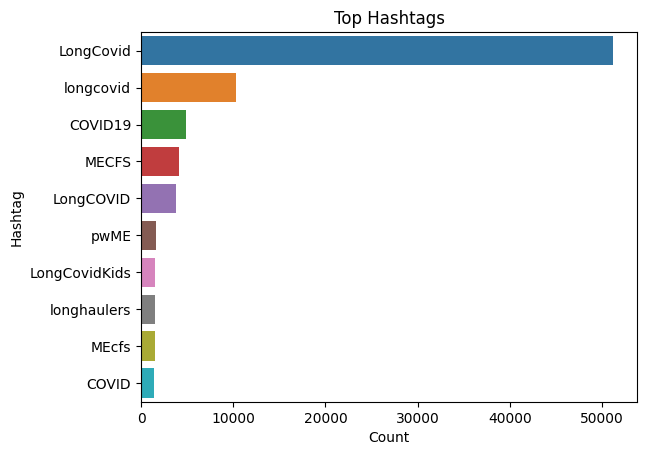

In [ ]:
import seaborn as sns

top_hashtags = preprocessedData['Hashtags'].explode().value_counts().head(10)
sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
plt.title('Top Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


## Encoding symptoms


In [ ]:
data = preprocessedData.copy()

In [ ]:
data = data.drop(columns = ["Hashtags","Symptoms"])

In [ ]:
data.reset_index(drop=True, inplace=True)
data.head()

,Tweets,Symptom_Categories
0,Another article on long term illness and reco...,[fatigue]
1,New analysis shows 27 potential biomarkers t...,[brain fog]
2,Yes is not the flu Its not you are old and di...,"[cold, cold]"
3,The COVID one in ten\nA number on a list\nThe ...,[brain fog]
4,Its not convenient especially now that everyo...,"[brain fog, cold]"


In [ ]:
data["Tweets"].isnull().sum()

0

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

symptoms_column = data['Symptom_Categories']

mlb = MultiLabelBinarizer()
symptoms_binary_matrix = mlb.fit_transform(symptoms_column)

symptoms_df = pd.DataFrame(symptoms_binary_matrix, columns=mlb.classes_)
symptoms_df

,blood clots,brain fog,cannot walk,cold,digestive system problems,dizzy,ear problems,eye problems,fatigue,fever,...,insomnia,lung problems,mentall illness,migraine,muscle pain,no taste/smell,nose problems,skin problems,throat pain,weight change
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67221,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
67222,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
67223,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
67224,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
symptom_counts = symptoms_df.sum()
symptom_counts

blood clots                    950
brain fog                    14015
cannot walk                    243
cold                         10079
digestive system problems     1321
dizzy                         1140
ear problems                    35
eye problems                   176
fatigue                      22653
fever                         1863
heart problems                1148
insomnia                      1054
lung problems                 2485
mentall illness               7978
migraine                       979
muscle pain                   3624
no taste/smell                 901
nose problems                  265
skin problems                 8650
throat pain                   1816
weight change                  182
dtype: int64

In [ ]:
data = pd.concat([data, symptoms_df], axis=1)

In [ ]:
data = data.drop(columns = "Symptom_Categories")

## Transformers

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=85a4850388e311e4dac583d053dcba0200b143a832f3512f73ba7e8bb6e4e116
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
embedded_tweets = []

for tweet in data['Tweets']:
    embedding = model.encode([tweet])[0]
    embedded_tweets.append(embedding)

data['Tweets'] = embedded_tweets

In [ ]:
data.head()

,Tweets,blood clots,brain fog,cannot walk,cold,digestive system problems,dizzy,ear problems,eye problems,fatigue,...,insomnia,lung problems,mentall illness,migraine,muscle pain,no taste/smell,nose problems,skin problems,throat pain,weight change
0,"[0.027009787, -0.05378052, 0.043369688, 0.1352...",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[0.016853621, -0.06542812, -0.005901794, 0.016...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[0.016055016, -0.057557475, 0.029499456, 0.021...",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[-0.041600645, -0.015870145, 0.0054861, 0.0148...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[0.002984609, -0.029329935, 0.026759554, 0.017...",0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = data['Tweets'].tolist()
Y = data.drop(['Tweets'], axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Models


### Logistic Regression Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


models = []
Y_preds = []

for col in Y_train.columns:
    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, Y_train[col])

    Y_pred = model.predict(X_test)

    models.append(model)
    Y_preds.append(Y_pred)

for i, col in enumerate(Y_test.columns):
    print(f"Symptom: {col}")
    print(classification_report(Y_test[col], Y_preds[i]))
    print("="*50)

all_symptoms_pred = np.array(Y_preds).T

all_symptoms_true = Y_test.values

report = classification_report(all_symptoms_true, all_symptoms_pred, target_names=Y_test.columns, output_dict=True)

print("Average Classification Report for All Symptoms:")
print(report['weighted avg'])

Symptom: blood clots
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19888
           1       0.91      0.65      0.76       280

    accuracy                           0.99     20168
   macro avg       0.95      0.82      0.88     20168
weighted avg       0.99      0.99      0.99     20168

Symptom: brain fog
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     15974
           1       0.85      0.60      0.70      4194

    accuracy                           0.89     20168
   macro avg       0.88      0.79      0.82     20168
weighted avg       0.89      0.89      0.89     20168

Symptom: cannot walk
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       0.00      0.00      0.00        85

    accuracy                           1.00     20168
   macro avg       0.50      0.50      0.50     20168
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19861
           1       0.90      0.42      0.57       307

    accuracy                           0.99     20168
   macro avg       0.94      0.71      0.78     20168
weighted avg       0.99      0.99      0.99     20168

Symptom: lung problems
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19390
           1       0.86      0.59      0.70       778

    accuracy                           0.98     20168
   macro avg       0.92      0.79      0.85     20168
weighted avg       0.98      0.98      0.98     20168

Symptom: mentall illness
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17808
           1       0.89      0.64      0.75      2360

    accuracy                           0.95     20168
   macro avg       0.92      0.82      0.86     20168
weighted avg       0.95   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



### Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)

classification_reports = []

for col in Y_train.columns:
    print("Symptom:", col)

    model.fit(X_train, Y_train[col])

    Y_pred = model.predict(X_test)

    report = classification_report(Y_test[col], Y_pred, output_dict=True)
    classification_reports.append(report)

    print(classification_report(Y_test[col], Y_pred))
    print("=" * 50)

avg_report = {
    'precision': sum([report['weighted avg']['precision'] for report in classification_reports]) / len(classification_reports),
    'recall': sum([report['weighted avg']['recall'] for report in classification_reports]) / len(classification_reports),
    'f1-score': sum([report['weighted avg']['f1-score'] for report in classification_reports]) / len(classification_reports),
    'support': sum([report['weighted avg']['support'] for report in classification_reports]) / len(classification_reports)
}

print("Average Classification Report for All Symptoms:")
print(avg_report)


Symptom: blood clots
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19888
           1       0.95      0.20      0.33       280

    accuracy                           0.99     20168
   macro avg       0.97      0.60      0.66     20168
weighted avg       0.99      0.99      0.99     20168

Symptom: brain fog
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     15974
           1       0.98      0.28      0.43      4194

    accuracy                           0.85     20168
   macro avg       0.91      0.64      0.67     20168
weighted avg       0.87      0.85      0.81     20168

Symptom: cannot walk
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       1.00      0.04      0.07        85

    accuracy                           1.00     20168
   macro avg       1.00      0.52      0.53     20168
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20164
           1       0.00      0.00      0.00         4

    accuracy                           1.00     20168
   macro avg       0.50      0.50      0.50     20168
weighted avg       1.00      1.00      1.00     20168

Symptom: eye problems


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20118
           1       0.00      0.00      0.00        50

    accuracy                           1.00     20168
   macro avg       0.50      0.50      0.50     20168
weighted avg       1.00      1.00      1.00     20168

Symptom: fatigue
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     13393
           1       0.96      0.59      0.73      6775

    accuracy                           0.85     20168
   macro avg       0.89      0.79      0.82     20168
weighted avg       0.87      0.85      0.84     20168

Symptom: fever
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     19603
           1       0.97      0.07      0.12       565

    accuracy                           0.97     20168
   macro avg       0.97      0.53      0.55     20168
weighted avg       0.97      0.97      0.9

### Decision Tree Model

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

accuracy_scores = []

for col in Y_train.columns:
    print("Symptom:", col)

    model = DecisionTreeClassifier(max_depth=10)

    model.fit(X_train, Y_train[col])

    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test[col], Y_pred)
    accuracy_scores.append(accuracy)

    print(classification_report(Y_test[col], Y_pred))
    print("Accuracy:", accuracy)
    print("=" * 50)

avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy Score:", avg_accuracy)


Symptom: blood clots
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19888
           1       0.58      0.28      0.38       280

    accuracy                           0.99     20168
   macro avg       0.78      0.64      0.69     20168
weighted avg       0.98      0.99      0.98     20168

Accuracy: 0.9871578738595795
Symptom: brain fog
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     15974
           1       0.77      0.21      0.33      4194

    accuracy                           0.82     20168
   macro avg       0.80      0.60      0.61     20168
weighted avg       0.81      0.82      0.78     20168

Accuracy: 0.8225902419674732
Symptom: cannot walk
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       0.00      0.00      0.00        85

    accuracy                           1.00     20168
   macro 

### XGBoost Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = []
Y_preds = []

for col in Y_train.columns:
    model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

    model.fit(X_train, Y_train[col])

    Y_pred = model.predict(X_test)

    models.append(model)
    Y_preds.append(Y_pred)

average_report = {
    'precision': 0,
    'recall': 0,
    'f1-score': 0,
    'support': len(Y_test)
}

for i, col in enumerate(Y_test.columns):
    print(f"Symptom: {col}")
    report = classification_report(Y_test[col], Y_preds[i], output_dict=True)
    average_report['precision'] += report['1']['precision']
    average_report['recall'] += report['1']['recall']
    average_report['f1-score'] += report['1']['f1-score']

    print(classification_report(Y_test[col], Y_preds[i]))
    print("="*50)

num_symptoms = len(Y_test.columns)
average_report['precision'] /= num_symptoms
average_report['recall'] /= num_symptoms
average_report['f1-score'] /= num_symptoms

print("Average Classification Report for All Symptoms:")
print(average_report)


Symptom: blood clots
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19888
           1       0.84      0.53      0.65       280

    accuracy                           0.99     20168
   macro avg       0.92      0.77      0.82     20168
weighted avg       0.99      0.99      0.99     20168

Symptom: brain fog
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     15974
           1       0.91      0.38      0.54      4194

    accuracy                           0.86     20168
   macro avg       0.88      0.69      0.73     20168
weighted avg       0.87      0.86      0.84     20168

Symptom: cannot walk
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20083
           1       0.62      0.06      0.11        85

    accuracy                           1.00     20168
   macro avg       0.81      0.53      0.55     20168
weighted avg 

### Neural Network Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

X_train = np.array(X_train)
X_test = np.array(X_test)

num_symptoms = len(Y_train.columns)

model = Sequential([
    Dense(64, activation='relu', input_shape=(384,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_symptoms, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=70, batch_size=32)

Y_pred = model.predict(X_test)

Y_pred_binary = (Y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(Y_test, Y_pred_binary, labels=range(num_symptoms)))


Epoch 1/70
1471/1471 [==============================] - 5s 2ms/step - loss: 0.1435 - accuracy: 0.4952
Epoch 2/70
1471/1471 [==============================] - 4s 3ms/step - loss: 0.0918 - accuracy: 0.6612
Epoch 3/70
1471/1471 [==============================] - 6s 4ms/step - loss: 0.0810 - accuracy: 0.6951
Epoch 4/70
1471/1471 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.7092
Epoch 5/70
1471/1471 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.7165
Epoch 6/70
1471/1471 [==============================] - 4s 3ms/step - loss: 0.0700 - accuracy: 0.7233
Epoch 7/70
1471/1471 [==============================] - 5s 4ms/step - loss: 0.0680 - accuracy: 0.7299
Epoch 8/70
1471/1471 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.7358
Epoch 9/70
1471/1471 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.7400
Epoch 10/70
1471/1471 [==============================] - 4s 3ms/step - loss: 0.063

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

